In [161]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from _utils import generate_hypersphere_points

In [162]:
X,y = make_blobs(n_samples=400, n_features=2, centers=2)
# X = (X - np.mean(X))/np.std(X, axis = 0)
y = np.where(y == 0, -1,1)[:, np.newaxis]

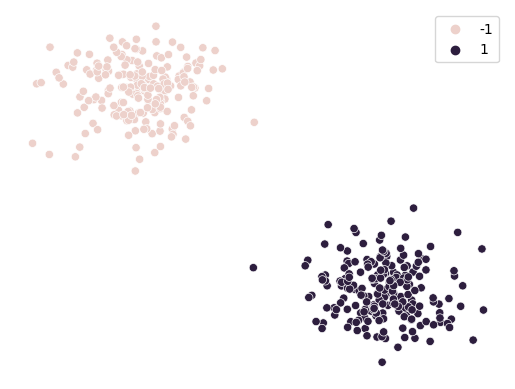

In [163]:
sns.scatterplot(x =X[:,0],y = X[:,1], hue = y.ravel())
plt.axis('off')
plt.show()

In [191]:
def generate_random_weights(dim=3):
    '''generates random n-dim weight vector'''
    return np.random.normal(loc=0, scale=1, size=(dim,1))

# w1x1 + w2x2 + w0 = 0
def hyper_plane(w):
    '''plots a hyperplane for given weight vector'''
    slope = -w.ravel()[0]/w.ravel()[1]
    intercept = -w.ravel()[2]/w.ravel()[1]
    h_x = np.linspace(-5,5,100)
    h_y = (slope * h_x) + intercept
    plt.plot(h_x,h_y, color = 'r')

def show(X,y,w):
    '''plots the data points along with the seperator line'''
    sns.scatterplot(x =X[:,0],y = X[:,1], hue = y.ravel())
    plt.axis('off')
    hyper_plane(w)
    plt.title(f"Accuracy Percentage : {accuracy(X,y,w)}%")
    plt.show()

def accuracy(X,y,w):
    '''shows the percentage of correctly classified points'''
    X_new = np.insert(X,len(X[0]),1, axis = 1)
    hs = np.sign(X_new@w)
    return np.round(np.mean(hs==y)*100,2)


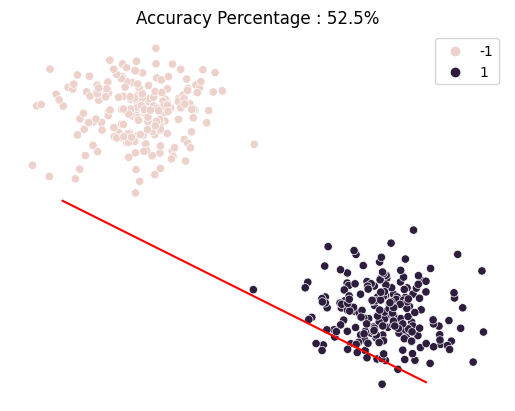

In [192]:
show(X,y,generate_random_weights(3))

In [199]:
def perceptron_algorithm(X, y, w, iterations = 5000, acc_threshold = 95):
    for iter in range(iterations):
        X_new = np.insert(X,X.shape[1],1,axis = 1)
        acc_perc = accuracy(X,y,w)
        # setting a threshold for acceptable error percentage
        if acc_perc < acc_threshold:
            # choose index of a random point
            point_idx = np.random.choice(X_new.shape[0])
            # check halfspace of the point w.r.t hyperplane
            hs = np.sign(X_new[point_idx]@w)
            # print(hs)
            # check whether the point is misclassified
            if hs != y[point_idx]:
                # update the weight vector
                w += (X_new[point_idx] * y[point_idx]).reshape(-1,1)
                # print(f"Weight{w}")
        else:
            break
        # show the plot for every 100th iteration
        if iter%100 == 0:
            print(f"Iteration -> {iter}")
            show(X,y,w)
    print('Final Classifier')
    show(X,y,w)
    return w


Iteration -> 0


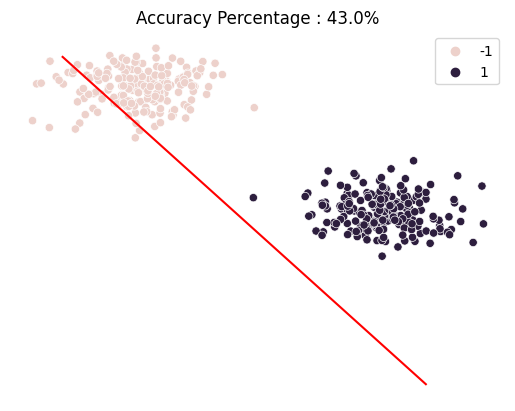

Final Classifier


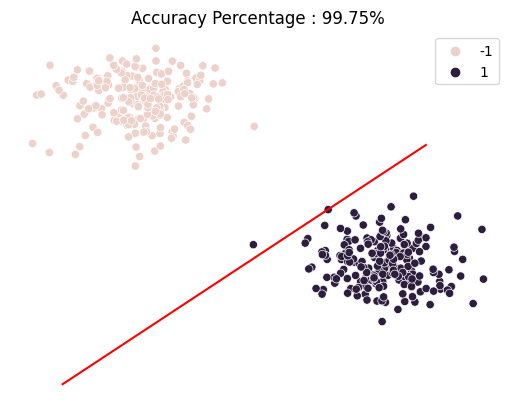

In [201]:
final_weights = perceptron_algorithm(X,y,generate_random_weights(3))

## Issues
- Iterating on each point will be slow
- We can take a batch on points and then update the weights

In [ ]:
# updated algoritm
